In [17]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
import joblib
import matplotlib.pyplot as plt
import numpy as np

## Training Dataset

In [3]:

# Load your training dataset
# Using the uploaded 'Youtube-Spam-Dataset.csv' with columns 'CONTENT' and 'CLASS'
file_path = 'dataset/youtube_spam.csv'
train_data = pd.read_csv(file_path)
train_texts = train_data['CONTENT']
train_labels = train_data['CLASS']


Training Data Size: 1956
Training Data Distribution:
CLASS
1    1005
0     951
Name: count, dtype: int64


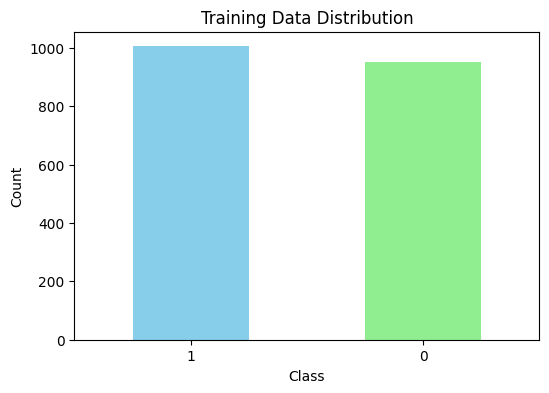

In [9]:
# Display training data size and distribution
print(f'Training Data Size: {len(train_data)}')
print('Training Data Distribution:')
print(train_labels.value_counts())

# Plot the distribution of classes in the training dataset
plt.figure(figsize=(6, 4))
train_labels.value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Training Data Distribution')
plt.xticks(rotation=0)
plt.show()

### Balancing Training Set

Balanced Training Data Size: 1902
Balanced Training Data Distribution:
CLASS
0    951
1    951
Name: count, dtype: int64


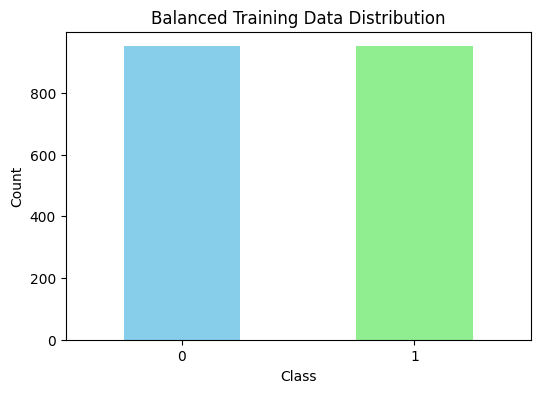

In [12]:
# Balancing the training data using upsampling
train_data_majority = train_data[train_data['CLASS'] == 0]
train_data_minority = train_data[train_data['CLASS'] == 1]

train_data_minority_upsampled = resample(train_data_minority, 
                                         replace=True,     # sample with replacement
                                         n_samples=len(train_data_majority),    # to match majority class
                                         random_state=42)  # reproducible results

train_data_balanced = pd.concat([train_data_majority, train_data_minority_upsampled])

# Display balanced training data size and distribution
print(f'Balanced Training Data Size: {len(train_data_balanced)}')
print('Balanced Training Data Distribution:')
print(train_data_balanced['CLASS'].value_counts())

# Plot the distribution of classes in the balanced training dataset
plt.figure(figsize=(6, 4))
train_data_balanced['CLASS'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Training Data Distribution')
plt.xticks(rotation=0)
plt.show()

## Text Preprocessing

In [4]:
# Preprocessing function for text cleaning
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Stemming and Lemmatization functions
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize(text):
    # Apply stemming and lemmatization
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)



In [5]:
# Apply preprocessing to the dataset
train_texts = train_texts.apply(preprocess_text).apply(stem_and_lemmatize)

# Convert the text data into TF-IDF feature vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train = tfidf_vectorizer.fit_transform(train_texts)
y_train = train_labels

Training Accuracy: 0.95
Training Precision: 0.95
Training Recall: 0.95
Training F1 Score: 0.95
Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       951
           1       0.95      0.96      0.96      1005

    accuracy                           0.95      1956
   macro avg       0.95      0.95      0.95      1956
weighted avg       0.95      0.95      0.95      1956

Confusion Matrix for Training Dataset:
[[902  49]
 [ 40 965]]


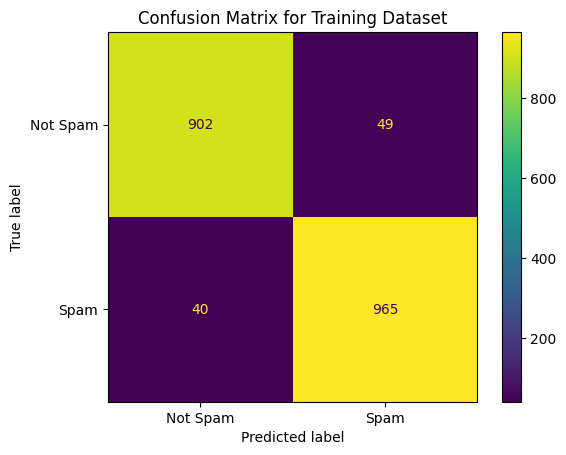

['tfidf_vectorizer.pkl']

In [18]:
# Define the model
model = MultinomialNB()

# Train the model on the entire balanced training dataset
model.fit(X_train, y_train)

# Display training results
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1 Score: {train_f1:.2f}')
print('Training Classification Report:')
print(classification_report(y_train, train_predictions))

# Confusion Matrix for the training dataset
train_conf_matrix = confusion_matrix(y_train, train_predictions)
print('Confusion Matrix for Training Dataset:')
print(train_conf_matrix)

# Display Confusion Matrix for the training dataset
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=['Not Spam', 'Spam'])
disp_train.plot()
plt.title('Confusion Matrix for Training Dataset')
plt.show()

# Save the trained model and vectorizer for baseline testing with a different dataset
joblib.dump(model, 'spam_detection_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

## Testing Model

In [13]:
# Load the new testing dataset for baseline testing
# Using the uploaded 'youtube_comments_i6IOiUi6IYY.xlsx'
test_file_path = 'youtube_comments_i6IOiUi6IYY.xlsx'
new_test_data = pd.read_excel(test_file_path)
new_test_texts = new_test_data['Comment']

# Apply preprocessing to the new testing dataset
new_test_texts = new_test_texts.apply(preprocess_text).apply(stem_and_lemmatize)


In [14]:
# Load the saved model and vectorizer
model = joblib.load('spam_detection_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')




                                               Comment  Prediction
0      Thomas Partey… man has been bringing it lately.           0
1    Saka is the best he prove this  everytime by d...           0
2       That pass from Ben White to Saka was amazing.            0
3                 Saka and Partey were so so good man            0
4    " Keep Saka's name out your mouth,  dude is wo...           0
..                                                 ...         ...
648                                                  r           1
649                                     Corrupt league           1
650                                               Like           0
651                                                  r           1
652                                     Corrupt league           1

[653 rows x 2 columns]
Confusion Matrix for New Testing Dataset:
[[250   0]
 [  0 403]]


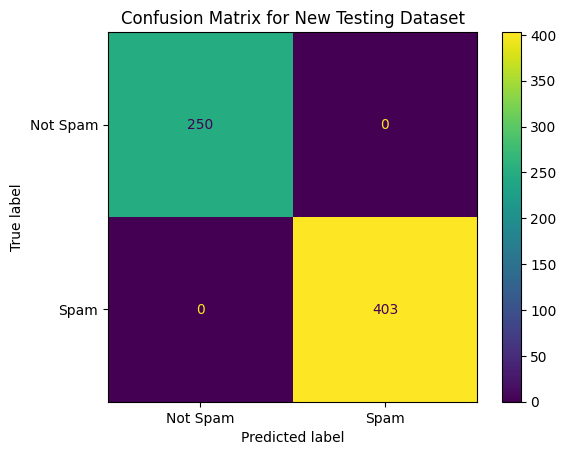

In [15]:
# Convert the new test data into TF-IDF feature vectors
X_new_test = tfidf_vectorizer.transform(new_test_texts)

# Predict using the new test dataset
new_test_predictions = model.predict(X_new_test)

# Display the results
new_test_data['Prediction'] = new_test_predictions
print(new_test_data[['Comment', 'Prediction']])

# Confusion Matrix for the new testing dataset
new_test_conf_matrix = confusion_matrix(new_test_data['Prediction'], new_test_predictions)
new_test_accuracy = accuracy_score(new_test_data['Prediction'], new_test_predictions)
new_test_precision = precision_score(new_test_data['Prediction'], new_test_predictions, average='weighted')
new_test_recall = recall_score(new_test_data['Prediction'], new_test_predictions, average='weighted')
new_test_f1 = f1_score(new_test_data['Prediction'], new_test_predictions, average='weighted')

print('Confusion Matrix for New Testing Dataset:')
print(new_test_conf_matrix)
print(f'Testing Accuracy: {new_test_accuracy:.2f}')
print(f'Testing Precision: {new_test_precision:.2f}')
print(f'Testing Recall: {new_test_recall:.2f}')
print(f'Testing F1 Score: {new_test_f1:.2f}')

# Display Confusion Matrix for the new testing dataset
disp_new = ConfusionMatrixDisplay(confusion_matrix=new_test_conf_matrix, display_labels=['Not Spam', 'Spam'])
disp_new.plot()
plt.title('Confusion Matrix for New Testing Dataset')
plt.show()

# Optionally, save the predictions to a CSV file
new_test_data.to_csv('new_test_predictions.csv', index=False)